In [2]:
using StructuralIdentifiability

In [3]:
using HomotopyContinuation

In [4]:
using AbstractAlgebra

In [5]:
using SymPy

In [6]:
include("functions.jl")

nemo2hc (generic function with 1 method)

# Test of general symbolic function

## DISCLAIMER: do not use S, gamma and beta as variable names and one between Q and L

## SLIQR

In [41]:
SLIQR = @ODEmodel(
	Sh'(t) = -b*Inf(t)*Sh(t)*Ninv - Sh(t)*Ninv*u(t),
	Lh'(t) = b*Inf(t)*Sh(t)*Ninv - a*Lh(t),
	Inf'(t) = -Inf(t)*g + s*Qh(t) + a*Lh(t),
	Qh'(t) = -e*Inf(t)*g + Inf(t)*g - s*Qh(t),
	y(t) = Inf(t)*Ninv
)

[ Info: Summary of the model:
[ Info: State variables: Sh, Lh, Inf, Qh
[ Info: Parameters: b, e, Ninv, s, g, a
[ Info: Inputs: u
[ Info: Outputs: y


Sh'(t) = -b*Sh(t)*Ninv*Inf(t) - Sh(t)*Ninv*u(t)
Lh'(t) = b*Sh(t)*Ninv*Inf(t) - Lh(t)*a
Inf'(t) = Lh(t)*a - Inf(t)*g + s*Qh(t)
Qh'(t) = -e*Inf(t)*g + Inf(t)*g - s*Qh(t)
y(t) = Ninv*Inf(t)


In [46]:
find_identifiable_functions(SLIQR)

[ Info: Computing IO-equations
┌ Info: Computed in 0.018535 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 0.018535
[ Info: Computing Wronskians
┌ Info: Computed in 0.0204828 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 0.0204828
[ Info: Dimensions of the Wronskians [32]
┌ Info: Ranks of the Wronskians computed in 0.0001159 seconds
│   :rank_time = :rank_time
└   rank_times = 0.0001159
[ Info: Simplifying identifiable functions
┌ Info: Computing normal forms (probabilistic)
│ Variables (6 in total): Nemo.QQMPolyRingElem[b, e, Ninv, s, g, a]
│ Up to degree: 2
└ Modulo: Finite field of characteristic 1073741827
[ Info: Used specialization points: 8
[ Info: Computing 7 Groebner bases for block orderings. Simplification code is 1
┌ Info: Final cleaning and simplification of generators. 
└ Out of 52 fractions 12 are syntactically unique.
[ Info: Checking inclusion with probability 0.995
[ Info: Inclusion checked in 0.0180259 seconds. Result: true
[ Info: Out of 40 initial gen

6-element Vector{AbstractAlgebra.Generic.Frac{Nemo.QQMPolyRingElem}}:
 s
 Ninv
 b
 g + a
 (e*a)//(e*s - s + a)
 (e^2*s^2*g - e*s^2*g + 2*e*s*g*a - s^2*a - s*g*a + s*a^2 + g*a^2)//(e*s - s + a)

In [47]:
find_identifiable_functions(SLIQR, with_states = true)

✓ # Computing specializations..    Time: 0:00:00
┌ Info: Computing normal forms (probabilistic)
│ Variables (10 in total): Nemo.QQMPolyRingElem[b, e, Ninv, s, g, a, Sh, L, Inf, Q]
│ Up to degree: 2
└ Modulo: Finite field of characteristic 1073741827
[ Info: Used specialization points: 22
[ Info: Computing 11 Groebner bases for block orderings. Simplification code is 1
┌ Info: Final cleaning and simplification of generators. 
└ Out of 90 fractions 25 are syntactically unique.
[ Info: Checking inclusion with probability 0.995
[ Info: Inclusion checked in 0.0405425 seconds. Result: true
[ Info: Out of 15 initial generators there are 10 indepdendent
[ Info: The ranking of the new set of generators is 332
[ Info: The search for identifiable functions concluded in 3.8232633 seconds


10-element Vector{AbstractAlgebra.Generic.Frac{Nemo.QQMPolyRingElem}}:
 Inf
 s
 Ninv
 b
 Sh*a
 g + a
 s*Q - Q*a
 Inf*a + Q*a + a*L
 e*s*g - s*g + g*a
 (Sh*s)//(e*g)

I should automatize this

In [55]:
names_map_SLIQR = [("Sh", "Sh2"), ("Lh", "Lh2"), ("Inf", "Inf2"), ("Qh","Qh2"), ("b","b2"), ("e","e2"),("g","g2"), ("a","a2")]

8-element Vector{Tuple{String, String}}:
 ("Sh", "Sh2")
 ("Lh", "Lh2")
 ("Inf", "Inf2")
 ("Qh", "Qh2")
 ("b", "b2")
 ("e", "e2")
 ("g", "g2")
 ("a", "a2")

In [56]:
find_transformations(SLIQR, names_map_SLIQR)

[ Info: Computing IO-equations
┌ Info: Computed in 0.0165896 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 0.0165896
[ Info: Computing Wronskians
┌ Info: Computed in 0.017064 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 0.017064
[ Info: Dimensions of the Wronskians [32]
┌ Info: Ranks of the Wronskians computed in 0.0001528 seconds
│   :rank_time = :rank_time
└   rank_times = 0.0001528
[ Info: Simplifying identifiable functions
┌ Info: Computing normal forms (probabilistic)
│ Variables (6 in total): Nemo.QQMPolyRingElem[b, e, Ninv, s, g, a]
│ Up to degree: 2
└ Modulo: Finite field of characteristic 1073741827
[ Info: Used specialization points: 8
[ Info: Computing 7 Groebner bases for block orderings. Simplification code is 1
┌ Info: Final cleaning and simplification of generators. 
└ Out of 52 fractions 12 are syntactically unique.
[ Info: Checking inclusion with probability 0.995
[ Info: Inclusion checked in 0.0160327 seconds. Result: true
[ Info: Out of 40 initial gen

5-element Vector{NTuple{8, Sym}}:
 (Sh2, Lh2, Inf2, Qh2, b, 1, a + g, 0)
 (Sh2, Lh2, Inf2, Qh2, b, e, g, a)
 (Sh2, Lh2, Inf2, Qh2, b, 0, a + g - s, s)
 (Sh2, Lh2, Inf2, Qh2, b, a*(a*g + a*s + a*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2) + 2*e*g*s - g*s - s^2 - s*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2))/(2*s*(a^2 + a*g - a*s + e*g*s - g*s)), a + g/2 - s/2 + sqrt(-4*e*g*s + g^2 + 2*g*s + s^2)/2, g/2 + s/2 - sqrt(-4*e*g*s + g^2 + 2*g*s + s^2)/2)
 (Sh2, Lh2, Inf2, Qh2, b, a*(a*g + a*s - a*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2) + 2*e*g*s - g*s - s^2 + s*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2))/(2*s*(a^2 + a*g - a*s + e*g*s - g*s)), a + g/2 - s/2 - sqrt(-4*e*g*s + g^2 + 2*g*s + s^2)/2, g/2 + s/2 + sqrt(-4*e*g*s + g^2 + 2*g*s + s^2)/2)

In [57]:
find_transformations(SLIQR, names_map_SLIQR, true)

[ Info: Computing IO-equations
┌ Info: Computed in 0.0405808 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 0.0405808
[ Info: Computing Wronskians
┌ Info: Computed in 0.0150143 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 0.0150143
[ Info: Dimensions of the Wronskians [32]
┌ Info: Ranks of the Wronskians computed in 0.0001069 seconds
│   :rank_time = :rank_time
└   rank_times = 0.0001069
[ Info: Simplifying identifiable functions
┌ Info: Computing normal forms (probabilistic)
│ Variables (6 in total): Nemo.QQMPolyRingElem[b, e, Ninv, s, g, a]
│ Up to degree: 2
└ Modulo: Finite field of characteristic 1073741827
[ Info: Used specialization points: 8
[ Info: Computing 7 Groebner bases for block orderings. Simplification code is 1
┌ Info: Final cleaning and simplification of generators. 
└ Out of 52 fractions 12 are syntactically unique.
[ Info: Checking inclusion with probability 0.995
[ Info: Inclusion checked in 0.013377 seconds. Result: true
[ Info: Out of 40 initial ge

3-element Vector{NTuple{8, Sym}}:
 (Sh, Lh, Inf, Qh, b, e, g, a)
 (Sh*a*(g + s - sqrt(-4*e*g*s + g^2 + 2*g*s + s^2))/(2*e*g*s), (Inf*a*e*g + Inf*a*e*s - Inf*a*e*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2) - Inf*a*g - Inf*a*s + Inf*a*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2) - 2*Inf*e^2*g*s + 2*Inf*e*g*s + Lh*a*e*g + Lh*a*e*s - Lh*a*e*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2) - Lh*a*g - Lh*a*s + Lh*a*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2) + 2*Qh*a*e*s - Qh*a*g - Qh*a*s + Qh*a*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2) + Qh*e*g*s - Qh*e*s^2 - Qh*e*s*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2))/(2*e*g*s*(e - 1)), Inf, Qh*(a*g - a*s - a*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2) - g*s + s^2 + s*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2))/(2*g*s*(e - 1)), b, a*(a*g + a*s - a*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2) + 2*e*g*s - g*s - s^2 + s*sqrt(-4*e*g*s + g^2 + 2*g*s + s^2))/(2*s*(a^2 + a*g - a*s + e*g*s - g*s)), a + g/2 - s/2 - sqrt(-4*e*g*s + g^2 + 2*g*s + s^2)/2, g/2 + s/2 + sqrt(-4*e*g*s + g^2 + 2*g*s + s^2)/2)
 (Sh*a*(g + s + sqrt(-4*e*g*s + g^2 + 2

In [42]:
assess_identifiability(SLIQR)

[ Info: Assessing local identifiability
[ Info: Local identifiability assessed in 0.0154602 seconds
[ Info: Assessing global identifiability
[ Info: Functions to check involve states
[ Info: Computing IO-equations
┌ Info: Computed in 0.0100759 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 0.0100759
[ Info: Computing Wronskians
┌ Info: Computed in 0.0080329 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 0.0080329
[ Info: Dimensions of the Wronskians [32]
┌ Info: Ranks of the Wronskians computed in 4.6e-5 seconds
│   :rank_time = :rank_time
└   rank_times = 4.6e-5
[ Info: Simplifying identifiable functions
✓ # Computing specializations..     Time: 0:00:00
┌ Info: Computing normal forms (probabilistic)
│ Variables (6 in total): Nemo.QQMPolyRingElem[b, e, Ninv, s, g, a]
│ Up to degree: 2
└ Modulo: Finite field of characteristic 1073741827
[ Info: Used specialization points: 8
[ Info: Computing 7 Groebner bases for block orderings. Simplification code is 1
┌ Info: Final cleani

Dict{Any, Symbol} with 10 entries:
  s    => :globally
  g    => :locally
  a    => :locally
  Sh   => :locally
  Lh   => :locally
  Inf  => :globally
  Qh   => :locally
  e    => :locally
  b    => :globally
  Ninv => :globally

## Goodwin

In [7]:
Goodwin = @ODEmodel(
	x1'(t) = (-b*c*x1(t) - b*x1(t)*x4(t) + 1)//(c + x4(t)),
	x2'(t) = alpha*x1(t) - bet*x2(t),
	x3'(t) = gamm*x2(t) - delt*x3(t),
	x4'(t) = (gamm*sigma*x2(t)*x4(t) - delt*sigma*x3(t)*x4(t))//x3(t),
	y(t) = x1(t)
)

[ Info: Summary of the model:
[ Info: State variables: x1, x2, x3, x4
[ Info: Parameters: b, alpha, c, sigma, gamm, bet, delt
[ Info: Inputs: 
[ Info: Outputs: y


x1'(t) = (-b*c*x1(t) - b*x1(t)*x4(t) + 1)//(c + x4(t))
x2'(t) = alpha*x1(t) - x2(t)*bet
x3'(t) = -x3(t)*delt + gamm*x2(t)
x4'(t) = (-sigma*x3(t)*delt*x4(t) + sigma*gamm*x2(t)*x4(t))//x3(t)
y(t) = x1(t)


In [60]:
id_funct =find_identifiable_functions(Goodwin)

[ Info: Computing IO-equations
┌ Info: Computed in 0.0463212 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 0.0463212
[ Info: Computing Wronskians
┌ Info: Computed in 0.0465401 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 0.0465401
[ Info: Dimensions of the Wronskians [69]
┌ Info: Ranks of the Wronskians computed in 0.0005052 seconds
│   :rank_time = :rank_time
└   rank_times = 0.0005052
[ Info: Simplifying identifiable functions
┌ Info: Computing normal forms (probabilistic)
│ Variables (7 in total): Nemo.QQMPolyRingElem[b, alpha, c, sigma, gamm, bet, delt]
│ Up to degree: 2
└ Modulo: Finite field of characteristic 1073741827
[ Info: Used specialization points: 6
[ Info: Computing 8 Groebner bases for block orderings. Simplification code is 1
┌ Info: Final cleaning and simplification of generators. 
└ Out of 61 fractions 10 are syntactically unique.
[ Info: Checking inclusion with probability 0.995
[ Info: Inclusion checked in 0.0182671 seconds. Result: true
[ Info: Out

5-element Vector{AbstractAlgebra.Generic.Frac{Nemo.QQMPolyRingElem}}:
 sigma
 c
 b
 bet*delt
 bet + delt

In [65]:
names_map_goodwin = [("x1", "x1n"), ("x2", "x2n"), ("x3", "x3n"), ("x4","x4n"), ("b","bn"), ("alpha","alphan"),("c","cn"), ("gamm","gammn"),("delt","deltn") , ("sigma", "sigman"), ("bet","betn")]

11-element Vector{Tuple{String, String}}:
 ("x1", "x1n")
 ("x2", "x2n")
 ("x3", "x3n")
 ("x4", "x4n")
 ("b", "bn")
 ("alpha", "alphan")
 ("c", "cn")
 ("gamm", "gammn")
 ("delt", "deltn")
 ("sigma", "sigman")
 ("bet", "betn")

In [66]:
find_transformations(Goodwin, names_map_goodwin)

[ Info: Computing IO-equations
┌ Info: Computed in 0.027024 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 0.027024
[ Info: Computing Wronskians
┌ Info: Computed in 0.0446908 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 0.0446908
[ Info: Dimensions of the Wronskians [69]
┌ Info: Ranks of the Wronskians computed in 0.0009487 seconds
│   :rank_time = :rank_time
└   rank_times = 0.0009487
[ Info: Simplifying identifiable functions
┌ Info: Computing normal forms (probabilistic)
│ Variables (7 in total): Nemo.QQMPolyRingElem[b, alpha, c, sigma, gamm, bet, delt]
│ Up to degree: 2
└ Modulo: Finite field of characteristic 1073741827
[ Info: Used specialization points: 6
[ Info: Computing 8 Groebner bases for block orderings. Simplification code is 1
┌ Info: Final cleaning and simplification of generators. 
└ Out of 61 fractions 10 are syntactically unique.
[ Info: Checking inclusion with probability 0.995
[ Info: Inclusion checked in 0.0106672 seconds. Result: true
[ Info: Out o

2-element Vector{NTuple{11, Sym}}:
 (x1n, x2n, x3n, x4n, b, alphan, c, gammn, delt, sigma, bet)
 (x1n, x2n, x3n, x4n, b, alphan, c, gammn, bet, sigma, delt)

In [8]:
assess_identifiability(Goodwin)

[ Info: Assessing local identifiability
[ Info: Local identifiability assessed in 0.0930509 seconds
[ Info: Assessing global identifiability
[ Info: Functions to check involve states
[ Info: Computing IO-equations
┌ Info: Computed in 0.5212213 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 0.5212213
[ Info: Computing Wronskians
┌ Info: Computed in 0.5441131 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 0.5441131
[ Info: Dimensions of the Wronskians [69]
┌ Info: Ranks of the Wronskians computed in 0.0002569 seconds
│   :rank_time = :rank_time
└   rank_times = 0.0002569
[ Info: Simplifying identifiable functions
✓ # Computing specializations..     Time: 0:00:01
┌ Info: Computing normal forms (probabilistic)
│ Variables (7 in total): Nemo.QQMPolyRingElem[b, alpha, c, sigma, gamm, bet, delt]
│ Up to degree: 2
└ Modulo: Finite field of characteristic 1073741827
[ Info: Used specialization points: 6
[ Info: Computing 8 Groebner bases for block orderings. Simplification code is 

Dict{Any, Symbol} with 11 entries:
  x2    => :nonidentifiable
  x4    => :globally
  x3    => :nonidentifiable
  sigma => :globally
  x1    => :globally
  delt  => :locally
  gamm  => :nonidentifiable
  b     => :globally
  bet   => :locally
  c     => :globally
  alpha => :nonidentifiable

In [67]:
find_transformations(Goodwin, names_map_goodwin, true)

[ Info: Computing IO-equations
┌ Info: Computed in 0.0298653 seconds
│   :ioeq_time = :ioeq_time
└   ioeq_time = 0.0298653
[ Info: Computing Wronskians
┌ Info: Computed in 0.0308695 seconds
│   :wrnsk_time = :wrnsk_time
└   wrnsk_time = 0.0308695
[ Info: Dimensions of the Wronskians [69]
┌ Info: Ranks of the Wronskians computed in 0.0003276 seconds
│   :rank_time = :rank_time
└   rank_times = 0.0003276
[ Info: Simplifying identifiable functions
┌ Info: Computing normal forms (probabilistic)
│ Variables (7 in total): Nemo.QQMPolyRingElem[b, alpha, c, sigma, gamm, bet, delt]
│ Up to degree: 2
└ Modulo: Finite field of characteristic 1073741827
[ Info: Used specialization points: 6
[ Info: Computing 8 Groebner bases for block orderings. Simplification code is 1
┌ Info: Final cleaning and simplification of generators. 
└ Out of 61 fractions 10 are syntactically unique.
[ Info: Checking inclusion with probability 0.995
[ Info: Inclusion checked in 0.0192472 seconds. Result: true
[ Info: Out

4-element Vector{NTuple{11, Sym}}:
 (x1, x2n, x3n, x4, b, alpha*x2n/x2, c, gamm*x2*x3n/(x2n*x3), delt, sigma, bet)
 (x1, x2n, x3n, x4, b, alpha*gamm*x2n/(bet*x3 - delt*x3 + gamm*x2), c, (bet*x3*x3n - delt*x3*x3n + gamm*x2*x3n)/(x2n*x3), bet, sigma, delt)
 (x1, x2n, 0, x4, b, alphan, c, 0, delt, sigma, bet)
 (x1, x2n, 0, x4, b, alphan, c, 0, bet, sigma, delt)

In [147]:
function make_invariant_Goodwin_case1(p::Array{Float64}, x0::Array{Float64}, par)
    """ beta, nu, delta, gamma, alpha
    S, inf, tr, N """
    
    x1 = x0[1]
    x2 = x0[2]
    x3 = x0[3]
    x4 = x0[4]
    b = p[1]
    alpha = p[2]
    c = p[3]
    gamm = p[4]
    delt = p[5]
    sigma = p[6]
    bet = p[7]
    par1 = par[1]
    par2 = par[2]

    q = zeros(7)
    q[1] = b
    q[2] = alpha*par1/x2
    q[3] = c
    q[4] = gamm*x2*par2/(par1*x3)
    q[5] = delt
    q[6] = sigma
    q[7] = bet
        
    z0 = zeros(4)
    
    z0[1] = x1
    z0[2] = par1
    z0[3] = par2
    z0[4] = x4
    return q, z0
     
end

make_invariant_Goodwin_case1 (generic function with 2 methods)

In [18]:
using DifferentialEquations

In [ ]:
Goodwin = @ODEmodel(
	x1'(t) = (-b*c*x1(t) - b*x1(t)*x4(t) + 1)//(c + x4(t)),
	x2'(t) = alpha*x1(t) - bet*x2(t),
	x3'(t) = gamm*x2(t) - delt*x3(t),
	x4'(t) = (gamm*sigma*x2(t)*x4(t) - delt*sigma*x3(t)*x4(t))//x3(t),
	y(t) = x1(t)
)

In [31]:
function Goodwin_2(du, u, p, t)
    b = p[1]
    alpha = p[2]
    c = p[3]
    gamm = p[4]
    delt = p[5]
    sigma = p[6]
    bet = p[7]
    du[1] = (-b*c*u[1] - b*u[1]*u[4] + 1)/(c + u[4])
    du[2] = alpha*u[1] - bet*u[2]
    du[3] = gamm*u[2] - delt*u[3]
    du[4] = (gamm*sigma*u[2]*u[4] - delt*sigma*u[3]*u[4])/u[3]
end

Goodwin_2 (generic function with 1 method)

In [34]:
using Plots
gr()

function magic_plot_goodwin(p::Array{Float64}, x0::Array{Float64}, par, case , t = [0.0, 0.001, 10.0])
    if case == 1
        q, z0 = make_invariant_Goodwin_case1(p, x0, par)
    elseif case == 2
        pass
    else 
        return
    end
    tspan = (t[1], t[3])
    t_values = t[1]:t[2]:t[3]
    
    #solve the first setting
    prob1 = ODEProblem(Goodwin_2, x0, tspan, p)
    sol1 = DifferentialEquations.solve(prob1, Vern7())
    S1 = [sol1(t)[1] for t in t_values]
    I1 = [sol1(t)[2] for t in t_values]
    T1 = [sol1(t)[3] for t in t_values]
    N1 = [sol1(t)[4] for t in t_values]
    
    #solve the second setting
    prob2 = ODEProblem(Goodwin_2, z0, tspan, q)
    sol2 = DifferentialEquations.solve(prob2, Vern7())
    S2 = [sol2(t)[1] for t in t_values]
    I2 = [sol2(t)[2] for t in t_values]
    T2 = [sol2(t)[3] for t in t_values]
    N2 = [sol2(t)[4] for t in t_values]
    
    #plot
    #to do: legend
    gr()
    pS = plot(t_values, S1, xlabel="t", ylabel="x1", color = "blue", label = "old")
    plot!(t_values, S2, xlabel="t", ylabel="x1", color = "red", label = "new")
    pI = plot(t_values, I1, xlabel="t", ylabel="x2", color = "blue")
    plot!(t_values, I2, xlabel="t", ylabel="x2", color = "red")
    pT = plot(t_values, T1, xlabel="t", ylabel="x3", color = "blue")
    plot!(t_values, T2, xlabel="t", ylabel="x3", color = "red")
    pN = plot(t_values, N1, xlabel="t", ylabel="x4", color = "blue")
    plot!(t_values, N2, xlabel="t", ylabel="x4", color = "red")
    plot(pS, pI, pT, pN, layout = (2,2), legend = false, size=(800, 800))
    
end
    

magic_plot (generic function with 2 methods)

In [9]:
x = 5

5

In [39]:
magic_plot_goodwin([1.0,2,3,4,5,6,7], [3.0,1,1,4], [5.0,8], 1)
savefig("goodwin1.png")

"C:\\Users\\lgand\\Documents\\BAI\\Ecole S5\\CS project\\CS project git\\goodwin1.png"

In [40]:
magic_plot_goodwin([1.0,1,1,1,1,1,1], [3.0,1,1,4], [5.0,8], 1)
savefig("goodwin11.png")

"C:\\Users\\lgand\\Documents\\BAI\\Ecole S5\\CS project\\CS project git\\goodwin11.png"

In [68]:
rand(5)*10

5-element Vector{Float64}:
 5.317481823173781
 9.992532376095923
 6.543764831053409
 5.713080976942875
 8.982624858613374

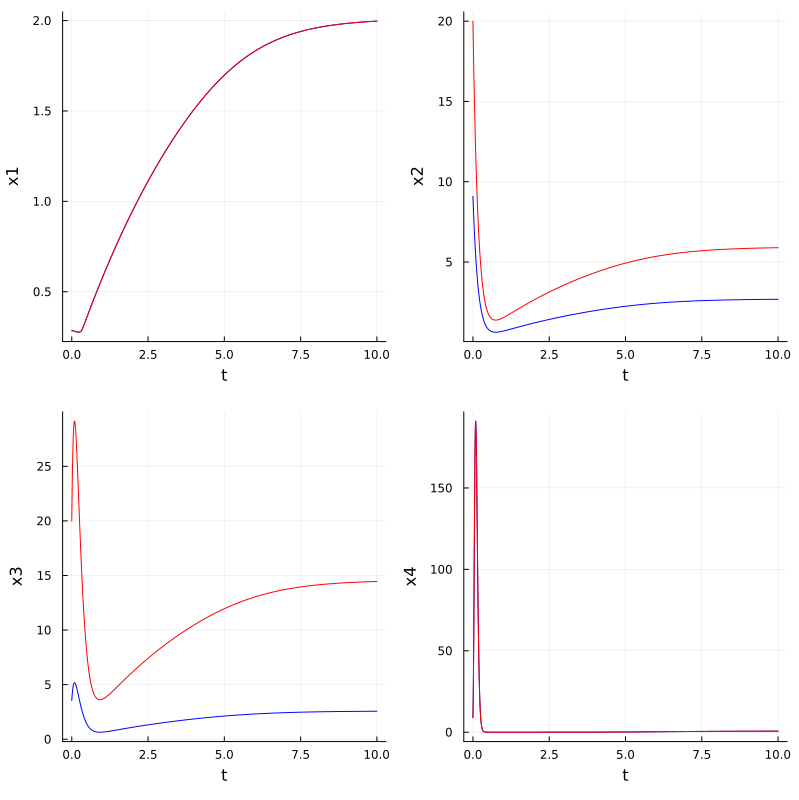

In [185]:
p = rand(7)*10
x = rand(4)*10
magic_plot(p, x, [20.0,20], 1, [0.0, 0.001, 10.0])


In [186]:
x, p

([0.2847523944610686, 9.09572073354457, 3.546718651579237, 8.92621976632817], [0.1917729834135551, 8.290626983412894, 1.918113031066364, 8.302276845746619, 8.674147230510892, 8.139475516493674, 6.175315356825735])

In [187]:
magic_plot(p, x, [20.0,20], 1,[0.0, 0.001, 20.0] )
savefig("goodwin14.png")


"C:\\Users\\lgand\\Documents\\BAI\\Ecole S5\\CS project\\CS project git\\goodwin14.png"